In [29]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

from General.Data_handling import import_hdf5, drive_letter


# image_loc = rf'{drive_letter()}:\OneDrive - TU Eindhoven\Master thesis\Plots\Calibration\H2O2'
dependent1 = 'H2O2'
loc1 = rf'{drive_letter()}:\OneDrive - TU Eindhoven\Master thesis\Measurements\Calibration\H2O2 cuvette\data.hdf5'
dat1 = import_hdf5(loc1, dependent1)
dependent2 = 'NO3-'
loc2 = rf'{drive_letter()}:\OneDrive - TU Eindhoven\Master thesis\Measurements\Calibration\NO3 cuvette\data.hdf5'
dat2 = import_hdf5(loc2, dependent2)
dependent3 = 'NO2-'
loc3 = rf'{drive_letter()}:\OneDrive - TU Eindhoven\Master thesis\Measurements\Calibration\NO2 cuvette\data.hdf5'
dat3 = import_hdf5(loc3, dependent3)

loc = r'E:\OneDrive - TU Eindhoven\Master thesis\Measurements\lamp_test.hdf5'
timestamp = []
intensity = []
with h5py.File(loc) as file:
    group = file['2023-11-08_lamp_stability']['uv-vis']
    wavelength = group.attrs['wavelength']
    background = group.attrs['background']
    for key in group.keys():
        timestamp.append(group[key].attrs['time_ms'])
        intensity.append(group[key][()]) 

intensity = np.array(intensity)
timestamp = np.array(timestamp)

spectrum_inten = intensity[-1]
absorbance1 = dat1.absorbances[-1]
absorbance2 = dat2.absorbances[-1]
absorbance3 = dat3.absorbances[-1]

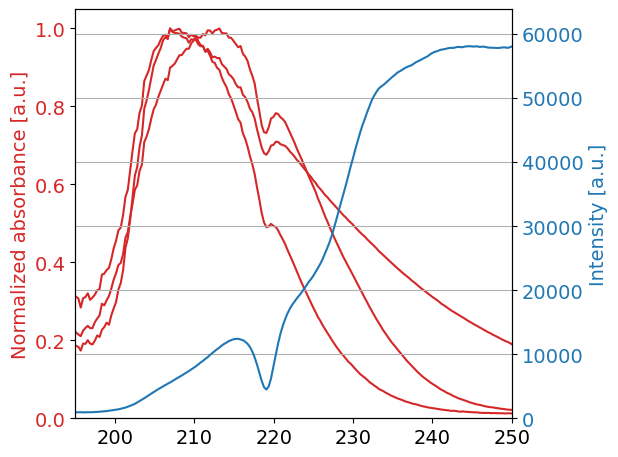

In [31]:
wavs = [195, 250]
wav_mask = (wavelength >= wavs[0]) & (wavelength <= wavs[1])

fig, ax2 = plt.subplots()
ax = ax2.twinx()
ax.plot(wavelength[wav_mask], spectrum_inten[wav_mask], color='tab:blue')
ax2.plot(wavelength[wav_mask], absorbance1[wav_mask]/np.max(absorbance1[wav_mask]), color='tab:red')
ax2.plot(wavelength[wav_mask], absorbance2[wav_mask]/np.max(absorbance2[wav_mask]), color='tab:red')
ax2.plot(wavelength[wav_mask], absorbance3[wav_mask]/np.max(absorbance3[wav_mask]), color='tab:red')
ax.set_xlabel('Wavelength [nm]')
ax.set_ylabel('Intensity [a.u.]', color='tab:blue')
ax.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_ylabel('Normalized absorbance [a.u.]', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax.set_xlim([wavs[0], wavs[1]])
ax.set_ylim([0, 1.1*np.max(spectrum_inten[wav_mask])])
ax2.set_ylim([0, 1.05])
ax.grid()
plt.tight_layout()
plt.savefig(rf'{drive_letter()}:\OneDrive - TU Eindhoven\Master thesis\Plots\Calibration\lamp spectrum\dip.pdf')
plt.show()